# Building Recognition

This is an attempt to use the techniques from Lesson 1 to recognize buildings

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
np.random.seed(2)

In [4]:
bs = 64 # alt: 16

## Load and view data

In [5]:
path = Path('../data')
path.ls()

[PosixPath('../data/empire'),
 PosixPath('../data/chrysler'),
 PosixPath('../data/models')]

In [6]:
tfms = get_transforms()

In [7]:
data = (ImageItemList.from_folder(path)
        .random_split_by_pct(0.20)
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch()
        .normalize(imagenet_stats)
       )

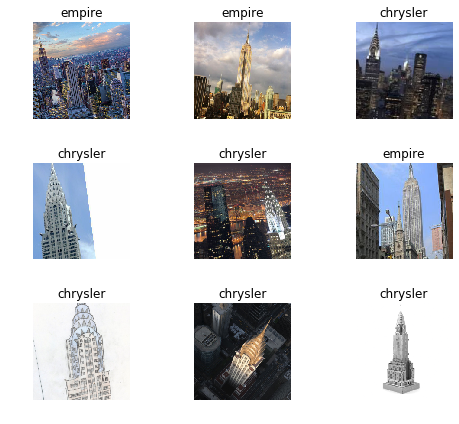

In [8]:
data.show_batch(rows=3, figsize=(7, 6))

In [9]:
print(data.classes)

['chrysler', 'empire']


## Resnet 34

### Train last layer

In [10]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.700970,0.330218,0.172414
2,0.457211,0.230653,0.103448
3,0.362673,0.242129,0.110345
4,0.304885,0.236368,0.103448


In [12]:
learn.save('res34-frozen')

### Results

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

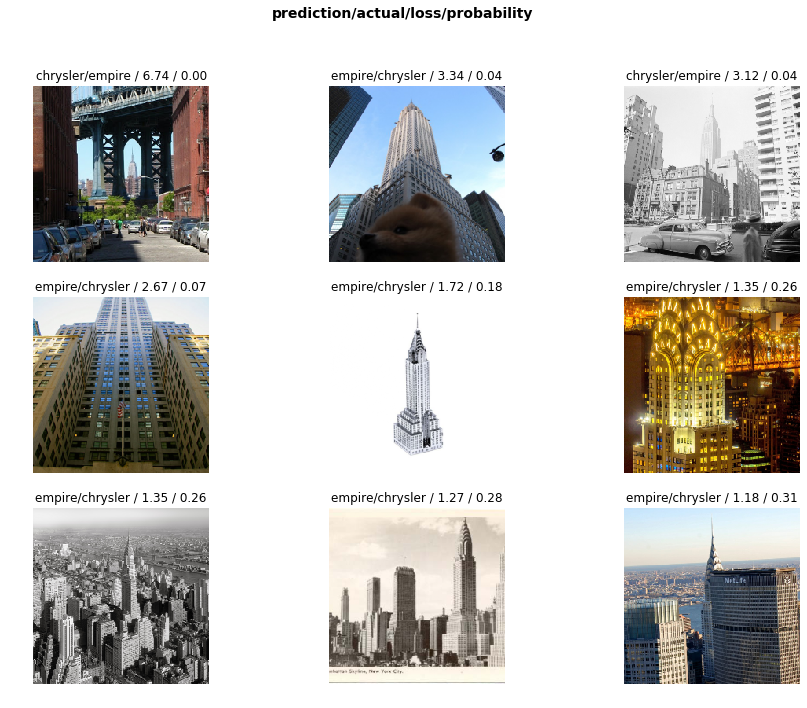

In [14]:
interp.plot_top_losses(9, figsize=(15, 11))

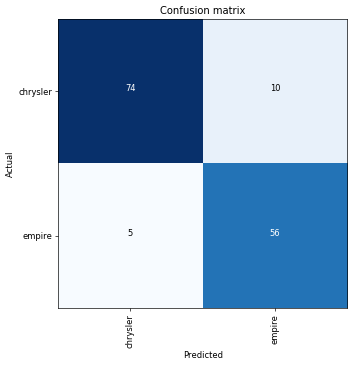

In [15]:
interp.plot_confusion_matrix(figsize=(6, 6), dpi=60)

## Unfrozen last layer

In [22]:
learn.load('res34-frozen')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (580 items)
[Category empire, Category empire, Category empire, Category empire, Category empire]...
Path: ../data
x: ImageItemList (580 items)
[Image (3, 1024, 683), Image (3, 400, 400), Image (3, 300, 450), Image (3, 395, 620), Image (3, 412, 550)]...
Path: ../data;

Valid: LabelList
y: CategoryList (145 items)
[Category chrysler, Category empire, Category empire, Category empire, Category chrysler]...
Path: ../data
x: ImageItemList (145 items)
[Image (3, 500, 375), Image (3, 565, 850), Image (3, 866, 1300), Image (3, 750, 1000), Image (3, 720, 540)]...
Path: ../data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


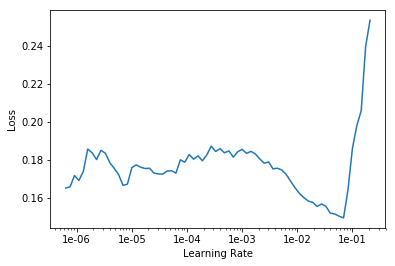

In [18]:
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.193940,0.231317,0.089655
2,0.168312,0.229424,0.082759


In [24]:
learn.save('res34-unfrozen')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

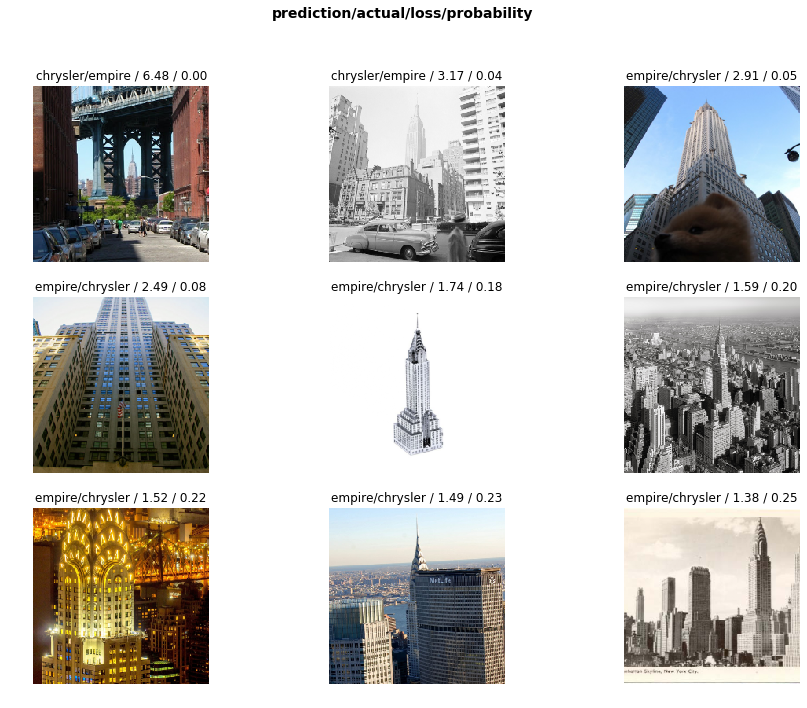

In [26]:
interp.plot_top_losses(9, figsize=(15, 11))

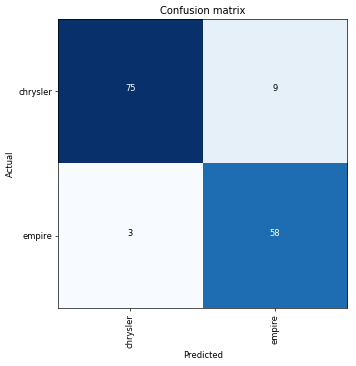

In [27]:
interp.plot_confusion_matrix(figsize=(6, 6), dpi=60)

## Training: resnet50

In [28]:
data = (ImageItemList.from_folder(path)
        .random_split_by_pct(0.20)
        .label_from_folder()
        .transform(tfms, size=299)
        .databunch(bs=bs // 2)
        .normalize(imagenet_stats)
       )

In [29]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


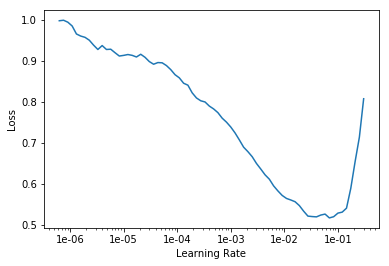

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,0.604622,0.215267,0.096552
2,0.422424,0.188071,0.062069
3,0.335238,0.193947,0.089655
4,0.259282,0.100138,0.048276
5,0.202775,0.122357,0.048276
6,0.181914,0.124776,0.048276
7,0.151688,0.100671,0.034483
8,0.129387,0.101166,0.041379


In [32]:
learn.save('res50-frozen')

In [33]:
learn.load('res50-frozen')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (580 items)
[Category empire, Category empire, Category empire, Category empire, Category empire]...
Path: ../data
x: ImageItemList (580 items)
[Image (3, 1024, 683), Image (3, 418, 625), Image (3, 400, 400), Image (3, 300, 450), Image (3, 784, 1162)]...
Path: ../data;

Valid: LabelList
y: CategoryList (145 items)
[Category chrysler, Category empire, Category empire, Category empire, Category chrysler]...
Path: ../data
x: ImageItemList (145 items)
[Image (3, 1797, 1200), Image (3, 510, 680), Image (3, 1250, 935), Image (3, 750, 1000), Image (3, 2448, 3264)]...
Path: ../data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
  

In [34]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.098921,0.101587,0.034483
2,0.086454,0.088903,0.041379
3,0.069008,0.080059,0.034483


If it doesn't, you can always go back to your previous model.

In [36]:
learn.save('res50-unfrozen');

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

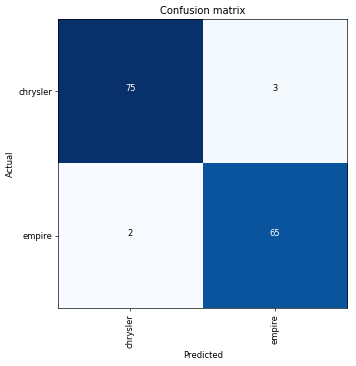

In [38]:
interp.plot_confusion_matrix(figsize=(6, 6), dpi=60)
# interp.most_confused(min_val=2)

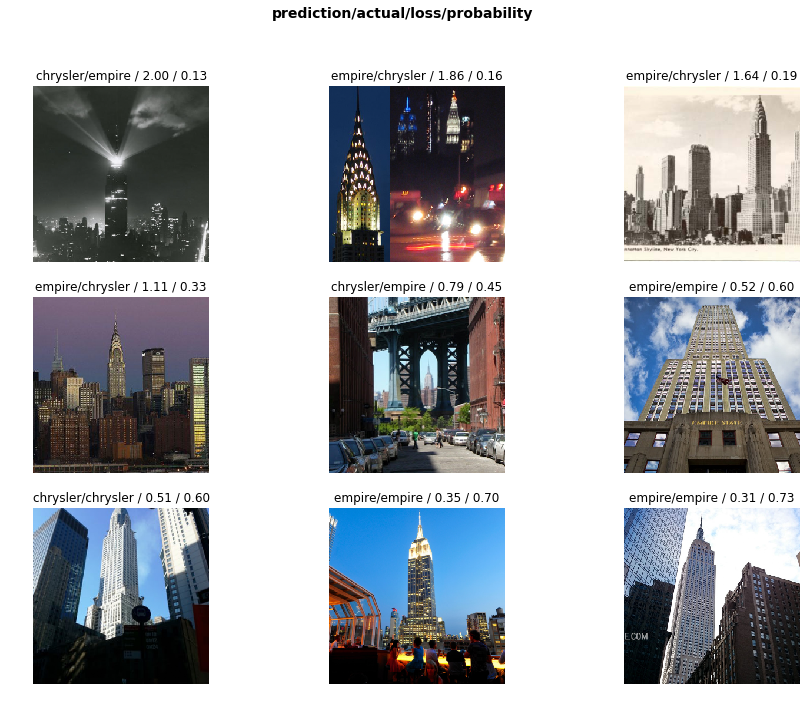

In [41]:
interp.plot_top_losses(9, figsize=(15, 11))